In [1]:
import tensorflow as tf
import numpy as np

from keras.datasets import cifar10
from keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, plot_model




Using TensorFlow backend.


In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
input_size = image_size * image_size * 3

# resize and normalize
x_train = np.reshape(x_train, [-1, input_size]) 
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [3]:
# hyper-parameters
batch_size = 256
n_units = 256
epochs = 3

In [4]:
# model is a 3-layer MLP
model = Sequential(name='3-layer-MLP')
model.add(Dense(n_units, input_dim=input_size, activation='relu', name='input_layer'))
model.add(Dense(n_units, activation='relu', name='hidden_layer'))
model.add(Dense(num_labels, activation='softmax', name='output_layer'))
model.summary()

Model: "3-layer-MLP"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 256)               786688    
_________________________________________________________________
hidden_layer (Dense)         (None, 256)               65792     
_________________________________________________________________
output_layer (Dense)         (None, 10)                2570      
Total params: 855,050
Trainable params: 855,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_test, y_test),
    epochs=epochs,
    batch_size=batch_size,
    verbose=0
)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)

print("\nTest accuracy: %.1f%%" % (100.0 * acc))


10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 34.1%


In [6]:
# load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
# input image dimensions
image_size = x_train.shape[1]
# resize and normalize
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (image_size, image_size, 3)
batch_size = 256
kernel_size = 3
pool_size = 3
filters = 32

In [8]:
model = Sequential()
model.add(Conv2D(filters=filters,
                 kernel_size=kernel_size, 
                 activation='relu', 
                 kernel_initializer='he_uniform', 
                 padding='same', 
                 input_shape=input_shape,
                 name='input_layer'))

model.add(MaxPooling2D(pool_size,name='hidden_layer'))
model.add(Flatten(name='hidden_layer2'))
model.add(Dense(10, activation='softmax',name='output_layer'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 32, 32, 32)        896       
_________________________________________________________________
hidden_layer (MaxPooling2D)  (None, 10, 10, 32)        0         
_________________________________________________________________
hidden_layer2 (Flatten)      (None, 3200)              0         
_________________________________________________________________
output_layer (Dense)         (None, 10)                32010     
Total params: 32,906
Trainable params: 32,906
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
# train the network
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,verbose=0)

loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 36.6%


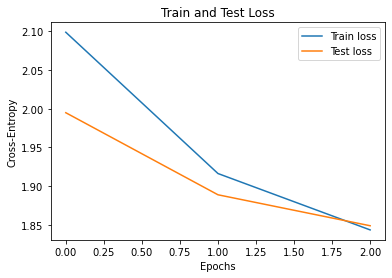

In [10]:
import matplotlib.pyplot as plt

# Plot history: Loss and accuracy
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
#plt.plot(history.history['val_acc'], label='Test accuracy')
plt.title('Train and Test Loss')
plt.ylabel('Cross-Entropy')
plt.xlabel('Epochs')
plt.legend(loc="upper right")
plt.show()